In [1]:
import pandas as pd
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, Column, Integer, String, Float, ForeignKey, func
import sqlite3

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

#### Connect to the SQLite database

In [2]:
engine = create_engine("sqlite:///output/hawaii.sqlite")

#Create the database
Base.metadata.create_all(engine)

#### Reflect Database into ORM classes

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# Map Measurement class
Measurement = Base.classes.measurement

In [5]:
# Map Station class
Station = Base.classes.station

In [6]:
# create a session
session = Session(engine)

### Climate Analysis and Exploration

In [7]:
start_date = input("type in start date (Month-day-Year").lower()

type in start date (Month-day-Year7-21-2018


In [8]:
end_date = input("type in end date (Month-day-Year").lower()

type in end date (Month-day-Year7-28-2018


### Precipitation Analysis

In [9]:
# last date recorded
for row in session.query(func.max(Measurement.date).label('maxdate')).all():
    print(row)

(datetime.date(2017, 8, 23),)


 #### Therefore, last 12 months would be from '2016-08-23' to '2017-08-23'

In [10]:
precipitation_data = session.query(Station, Measurement).filter(Station.station == Measurement.station).\
filter( Measurement.date >= dt.date(2016,8,23)).\
       filter(Measurement.date <=dt.date(2017,8,23)).\
       group_by(func.strftime("%Y-%m", Measurement.date)).\
       order_by(Measurement.date).all()

annual_precipitation = []

for record in precipitation_data:
    (s,m) = record
    annual_precipitation.append([s.station,m.date, m.prcp])
    print( f" '{s.station,m.date, m.prcp}'")


 '('USC00519397', datetime.date(2016, 8, 23), 0.0)'
 '('USC00519397', datetime.date(2016, 9, 1), 0.0)'
 '('USC00519397', datetime.date(2016, 10, 1), 0.0)'
 '('USC00519397', datetime.date(2016, 11, 1), 0.0)'
 '('USC00519397', datetime.date(2016, 12, 1), 0.12)'
 '('USC00519397', datetime.date(2017, 1, 1), 0.0)'
 '('USC00519397', datetime.date(2017, 2, 1), 0.0)'
 '('USC00519397', datetime.date(2017, 3, 1), 1.19)'
 '('USC00519397', datetime.date(2017, 4, 1), 0.0)'
 '('USC00519397', datetime.date(2017, 5, 1), 0.26)'
 '('USC00519397', datetime.date(2017, 6, 1), 0.0)'
 '('USC00519397', datetime.date(2017, 7, 1), 0.02)'
 '('USC00519397', datetime.date(2017, 8, 1), 0.02)'


In [11]:
df = pd.DataFrame(annual_precipitation, columns=['name', 'date','prcp'])
df

,name,date,prcp
0,USC00519397,2016-08-23,0.00
1,USC00519397,2016-09-01,0.00
2,USC00519397,2016-10-01,0.00
3,USC00519397,2016-11-01,0.00
4,USC00519397,2016-12-01,0.12
5,USC00519397,2017-01-01,0.00
6,USC00519397,2017-02-01,0.00
7,USC00519397,2017-03-01,1.19
8,USC00519397,2017-04-01,0.00
9,USC00519397,2017-05-01,0.26


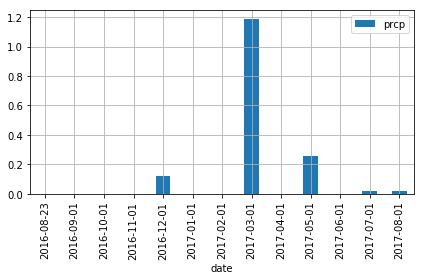

In [12]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(annual_precipitation, columns=['name', 'date','prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.grid()
plt.show()

In [13]:
df.describe()

,prcp
count,13.000000
mean,0.123846
std,0.329078
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,1.190000


### Station Analysis

In [14]:
# total_number_of_stations
total_number_of_stations = session.query(Station, Measurement).\
filter(Station.station == Measurement.station).\
group_by(Measurement.station).count()
print(f"The total number of stations are: '{total_number_of_stations}'")

The total number of stations are: '9'


In [15]:
# most_active_stations
Measurement_list = session.query(Station.name,func.count(Measurement.date).label('#Obs')).\
filter(Station.station == Measurement.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()


# tests = [result for result in Measurement_list]
most_active_stations_df = pd.DataFrame(Measurement_list)
most_active_stations_df


,name,#Obs
0,"WAIHEE 837.5, HI US",2772
1,"KANEOHE 838.1, HI US",2696
2,"WAIKIKI 717.2, HI US",2685
3,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,"MANOA LYON ARBO 785.2, HI US",2484
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,"PEARL CITY, HI US",683
8,"UPPER WAHIAWA 874.3, HI US",342


#### WAIHEE had highest number of observations

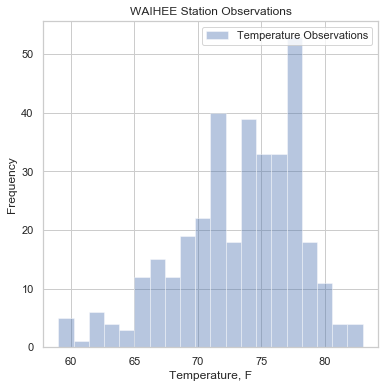

In [16]:
#Therefore, last 12 months would be from '2016-08-23' to '2017-08-23'
twelve_month_precipitation_data = session.query(Measurement.tobs).filter(Station.station == Measurement.station).\
    filter( Measurement.date >= dt.date(2016,8,23)).\
    filter(Measurement.date <=dt.date(2017,8,23)).\
    filter(Station.name == 'WAIHEE 837.5, HI US').all()
    
twelve_month_precipitation_data_list = [result for result in twelve_month_precipitation_data]
twelve_month_precipitation_data_list

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

sns.distplot(twelve_month_precipitation_data_list, bins=20, kde=False,label="Temperature Observations");

ax.legend(ncol=2, loc="upper right", frameon=True);
ax.set(title="WAIHEE Station Observations", ylabel="Frequency",xlabel="Temperature, F");



### Temperature Analysis

In [17]:
def calc_temps(start_date, end_date):
    return func.strftime("%Y-%m", start_date)
calc_temps("2016-03-4","2016-03-4")

query_date = func.strftime("%Y-%m", start_date) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  strftime(:strftime_1, :strftime_2) - :strftime_3


In [18]:
#assumes format `%Y-%m-%d`
def calc_temps(start_date, end_date):
    result = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).first()        
    return result

calc_temps("2011-3-4","2016-7-4")

(86.0, 53.0, 73.07489214840379)

In [19]:
trip_stats = calc_temps("2011-06-15","2011-07-4")
trip_stats

(81.0, 67.0, 74.48407643312102)

In [20]:
# calc the prior year
prior_year_trip_stats = calc_temps("2010-06-15","2010-7-4")
prior_year_trip_stats

(87.0, 58.0, 73.67077922077922)

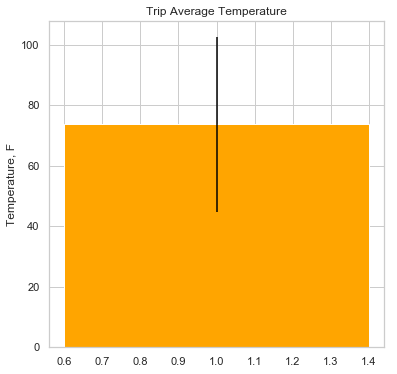

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
ax.bar(1,prior_year_trip_stats[2], yerr=prior_year_trip_stats[1]-prior_year_trip_stats[0], align='center',color='orange', ecolor='black');
ax.set(title="Trip Average Temperature", ylabel="Temperature, F",xlabel="");